# Part 1: Applying SVM algorithm on 3 different sample data

 * **1.1. Simple linearly seperable data :**

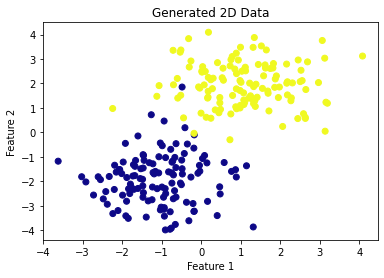

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate simple data
n_samples = 250
centers = [[-1, -2], [1, 2]]
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=1, random_state=42)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.title("Generated 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


* ***Using different kernels for our SVM model and plotting the results:***

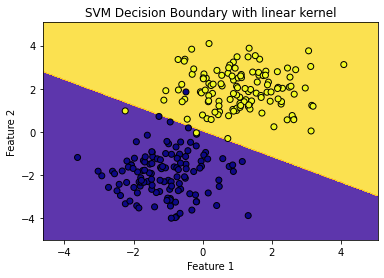

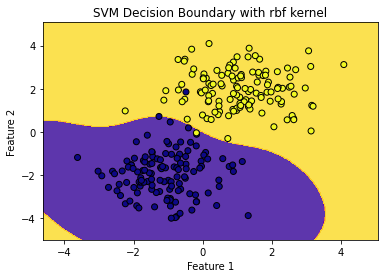

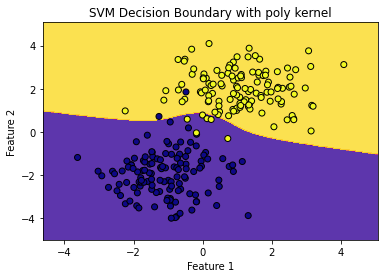

In [11]:
from sklearn.svm import SVC

def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='plasma')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
    plt.title(f"SVM Decision Boundary with {model.kernel} kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train SVM with linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)
plot_decision_boundary(X, y, linear_svm)

# Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma= 'auto')
rbf_svm.fit(X, y)
plot_decision_boundary(X, y, rbf_svm)

# Train SVM with polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X, y)
plot_decision_boundary(X, y, poly_svm)


* ***Testing different gamma values for our SVM with RBF kernel***

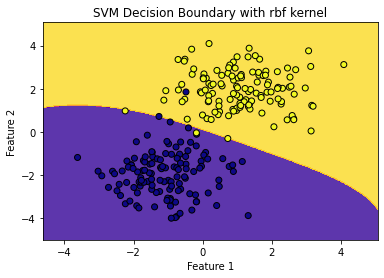

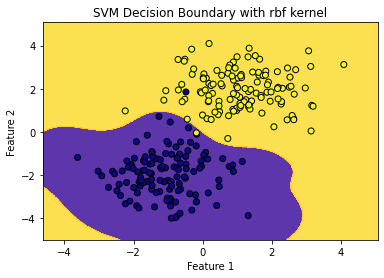

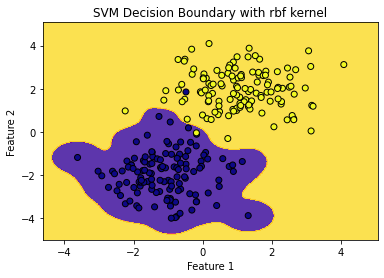

In [12]:
# SVM with RBF kernel and different gamma values
gamma_values = [0.1, 1, 5]
for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', gamma=gamma)
    rbf_svm.fit(X, y)
    plot_decision_boundary(X, y, rbf_svm)


*  **1.2. Non-linearly seperable data :**

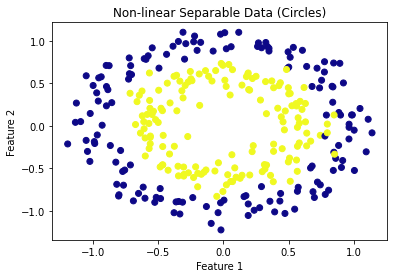

In [13]:
from sklearn.datasets import make_circles

# Non-linear separable data
X2, y2 = make_circles(n_samples=300, factor=0.6, noise=0.1, random_state=42)

# Plotting the data
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='plasma')
plt.title("Non-linear Separable Data (Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

* ***Testing different gamma values for our SVM with RBF kernel, on circle data***

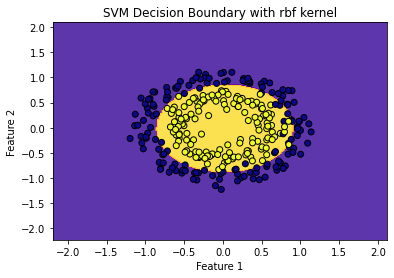

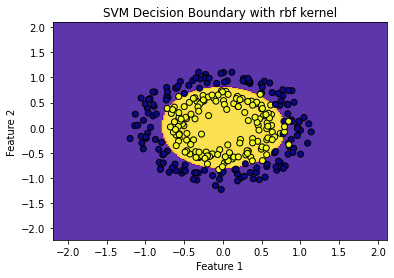

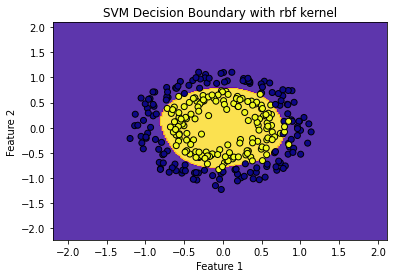

In [14]:
# SVM with RBF kernel and different gamma values
gamma_values = [0.1, 1, 5]
for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', gamma=gamma)
    rbf_svm.fit(X2, y2)
    plot_decision_boundary(X2, y2, rbf_svm)


* ***Testing different degree values for our SVM with Polynomial kernel***

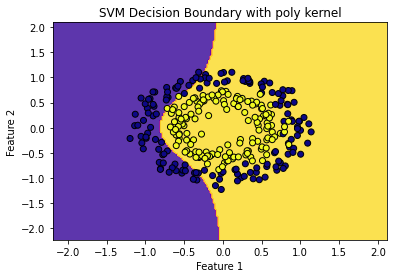

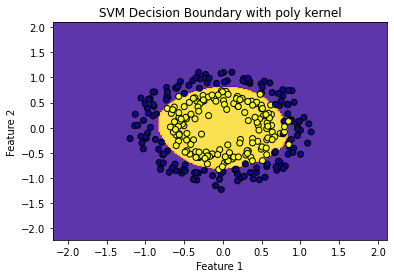

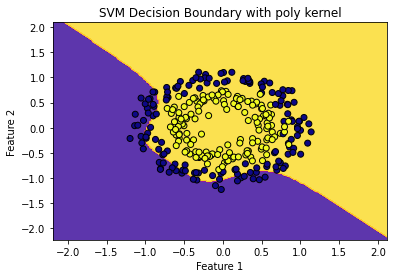

In [15]:
# SVM with polynomial kernel and different degree values
degree_values = [3, 4, 5]
for degree in degree_values:
    poly_svm = SVC(kernel='poly', degree=degree)
    poly_svm.fit(X2, y2)
    plot_decision_boundary(X2, y2, poly_svm)


*  **1.3. More complex Non-linearly seperable data :**

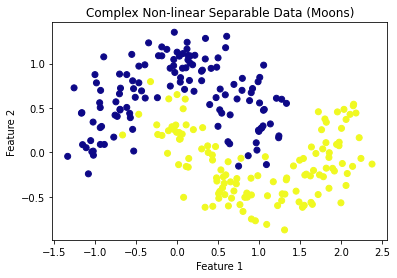

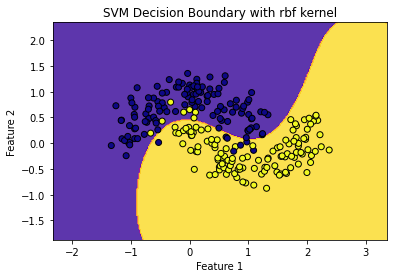

In [16]:
from sklearn.datasets import make_moons

# Complex non-linear separable data
X3, y3 = make_moons(n_samples=n_samples, noise=0.2, random_state=42)

# Plotting the data
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='plasma')
plt.title("Complex Non-linear Separable Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train SVM with RBF kernel and visualize decision boundary
complex_svm = SVC(kernel='rbf', gamma='auto')
complex_svm.fit(X3, y3)
plot_decision_boundary(X3, y3, complex_svm)


* ***Testing different degree values for our SVM with Polynomial kernel, on moon data***

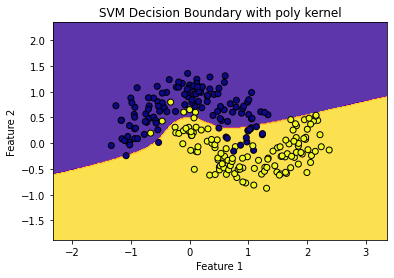

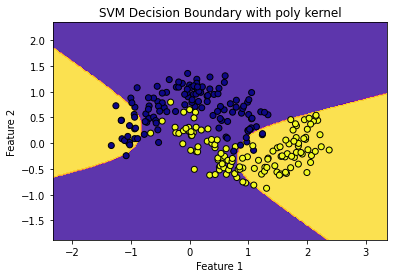

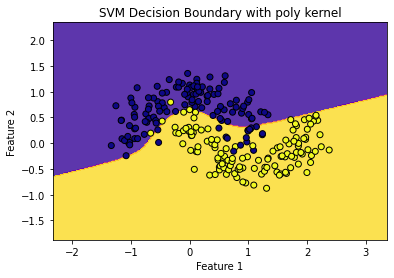

In [17]:
# SVM with polynomial kernel and different degree values
degree_values = [3, 4, 5]
for degree in degree_values:
    poly_svm = SVC(kernel='poly', degree=degree)
    poly_svm.fit(X3, y3)
    plot_decision_boundary(X3, y3, poly_svm)


* ***Testing different gamma values for our SVM with RBF kernel, on moon data***

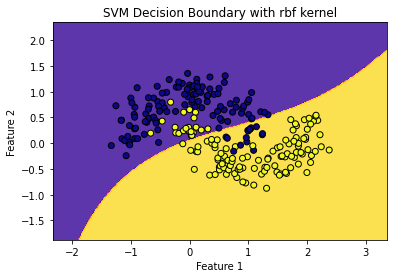

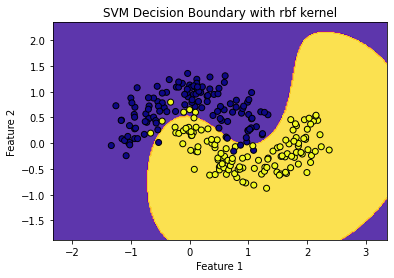

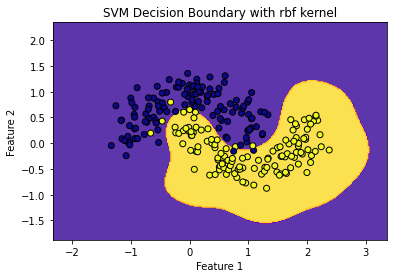

In [18]:
# SVM with RBF kernel and different gamma values
gamma_values = [0.1, 1, 5]
for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', gamma=gamma)
    rbf_svm.fit(X3, y3)
    plot_decision_boundary(X3, y3, rbf_svm)


# Part 2: Applying SVM algorithm on the Fashion MNIST dataset

In [19]:
import tensorflow as tf
from sklearn import metrics

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
# Preprcess the images

train_images = train_images / 255.0
test_images = test_images / 255.0

In [21]:
# Selecting only first 10% of the Data

X = train_images.reshape(60000, -1)[:6000,:]
y = test_images.reshape(10000, -1)[:1000,:]

* ***Applying SVM with no kernel(linear)***

In [22]:
# Train SVM with linear kernel for MNIST classification

linear_svm.fit(X, train_labels[:6000])

# Predict
y_pred = linear_svm.predict(y)

# Print the accuracy of the model
print("accuracy:", metrics.accuracy_score(y_true=test_labels[:1000], y_pred=y_pred))

accuracy: 0.823


* ***Applying SVM with RBF kernel and gamma = 0.01***

In [23]:
# Train SVM with rbf kernel for MNIST classification

rbf_svm = SVC(kernel='rbf', gamma= .01)
rbf_svm.fit(X, train_labels[:6000])

# Predict
y_pred = rbf_svm.predict(y)

# Print the accuracy of the model
print("accuracy:", metrics.accuracy_score(y_true=test_labels[:1000], y_pred=y_pred))

accuracy: 0.861


# Part 3: Applying SVM algorithm on car tags dataset

* ***Applying SVM with no kernel and printing out Classification report***

In [24]:
import os
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the path to the folders
data_path = 'D:\Downloads\Telegram Desktop\SVM_Project\persian_LPR'

# Initialize data and labels arrays
X = []
y = []

# Load images and labels
labels = ['2', '3', '7', 'S', 'W']
for label in labels:
    folder_path = os.path.join(data_path, label)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.bmp'):
            # Read the image
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue
            # Flatten and normalize the image
            flattened_image = image.flatten() / 255.0
            X.append(flattened_image)
            y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.96      0.96        56
           3       0.98      0.97      0.98        65
           7       0.98      0.98      0.98        49
           S       0.95      0.95      0.95        66
           W       0.95      0.95      0.95        64

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



* ***Applying SVM with RBF kernel and printing out Classification report***

In [5]:
# Train the SVM model with an rbf kernel
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96        56
           3       0.97      1.00      0.98        65
           7       0.98      0.98      0.98        49
           S       0.95      0.94      0.95        66
           W       0.94      0.95      0.95        64

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

